# Numpy

In [3]:
import numpy as np
import pprint

## Reading market data from Google

In [4]:
markets = {}
values = []

with open("../dataset/markets.csv", "r") as file:
    for l in file.readlines():
        name, url, v, change_perc = l.split(";")
        markets[name] = url
        v = v.replace(",", "")
        change_perc = change_perc.replace("%", "")
        vals = [float(v), float(change_perc)]
        values.append(vals)

In [5]:
# we have a lists and a dictionary
pprint.pprint (values)
pprint.pprint (markets)

[[67.87, 3.08],
 [25733.6, -0.34],
 [1202.9, 0.24],
 [2861.82, -0.04],
 [7574.24, 0.11],
 [6360.59, -2.01],
 [110.5, 0.31],
 [7889.1, 0.38],
 [2.82, -0.74],
 [1.29, 0.12],
 [22362.55, 0.64],
 [12.06, -6.22],
 [1721.69, 0.21],
 [14.74, -0.18],
 [1.16, 0.27]]
{'10-Yr Bond': 'https://finance.yahoo.com/world-indices/quote/^TNX?p=^TNX',
 'BTC-USD': 'https://finance.yahoo.com/world-indices/quote/BTC-USD?p=BTC-USD',
 'Crude Oil': 'https://finance.yahoo.com/world-indices/quote/CL=F?p=CL=F',
 'Dow 30': 'https://finance.yahoo.com/world-indices/quote/^DJI?p=^DJI',
 'EUR/USD': 'https://finance.yahoo.com/world-indices/quote/EURUSD=X?p=EURUSD=X',
 'FTSE 100': 'https://finance.yahoo.com/world-indices/quote/^FTSE?p=^FTSE',
 'GBP/USD': 'https://finance.yahoo.com/world-indices/quote/GBPUSD=X?p=GBPUSD=X',
 'Gold': 'https://finance.yahoo.com/world-indices/quote/GC=F?p=GC=F',
 'Nasdaq': 'https://finance.yahoo.com/world-indices/quote/^IXIC?p=^IXIC',
 'Nikkei 225': 'https://finance.yahoo.com/world-indices/qu

## Converting to numpy array

In [6]:
# we have a matrix of values now
array = np.array(values)
print(array)
print("number of elements: %d" % array.size)

[[ 6.787000e+01  3.080000e+00]
 [ 2.573360e+04 -3.400000e-01]
 [ 1.202900e+03  2.400000e-01]
 [ 2.861820e+03 -4.000000e-02]
 [ 7.574240e+03  1.100000e-01]
 [ 6.360590e+03 -2.010000e+00]
 [ 1.105000e+02  3.100000e-01]
 [ 7.889100e+03  3.800000e-01]
 [ 2.820000e+00 -7.400000e-01]
 [ 1.290000e+00  1.200000e-01]
 [ 2.236255e+04  6.400000e-01]
 [ 1.206000e+01 -6.220000e+00]
 [ 1.721690e+03  2.100000e-01]
 [ 1.474000e+01 -1.800000e-01]
 [ 1.160000e+00  2.700000e-01]]
number of elements: 30


In [10]:
array.reshape(1,-1)

array([[ 6.787000e+01,  3.080000e+00,  2.573360e+04, -3.400000e-01,
         1.202900e+03,  2.400000e-01,  2.861820e+03, -4.000000e-02,
         7.574240e+03,  1.100000e-01,  6.360590e+03, -2.010000e+00,
         1.105000e+02,  3.100000e-01,  7.889100e+03,  3.800000e-01,
         2.820000e+00, -7.400000e-01,  1.290000e+00,  1.200000e-01,
         2.236255e+04,  6.400000e-01,  1.206000e+01, -6.220000e+00,
         1.721690e+03,  2.100000e-01,  1.474000e+01, -1.800000e-01,
         1.160000e+00,  2.700000e-01]])

## Recover yesterday's price

In [11]:
# without matrices we need to do it using a loop or accesing each element
price = array[0,0]
delta = array[0,1]
price_yesterday = price + delta
print(price, price_yesterday)

67.87 70.95


Yesterday's prices

In [12]:
#using matrix sum
yesterday = array[:, 0] + array[:, 1]
print(yesterday)

[7.095000e+01 2.573326e+04 1.203140e+03 2.861780e+03 7.574350e+03
 6.358580e+03 1.108100e+02 7.889480e+03 2.080000e+00 1.410000e+00
 2.236319e+04 5.840000e+00 1.721900e+03 1.456000e+01 1.430000e+00]


In [13]:
#using accumulative sum
period = np.cumsum(array, 1)[:, 0:2]
print(period)

[[6.787000e+01 7.095000e+01]
 [2.573360e+04 2.573326e+04]
 [1.202900e+03 1.203140e+03]
 [2.861820e+03 2.861780e+03]
 [7.574240e+03 7.574350e+03]
 [6.360590e+03 6.358580e+03]
 [1.105000e+02 1.108100e+02]
 [7.889100e+03 7.889480e+03]
 [2.820000e+00 2.080000e+00]
 [1.290000e+00 1.410000e+00]
 [2.236255e+04 2.236319e+04]
 [1.206000e+01 5.840000e+00]
 [1.721690e+03 1.721900e+03]
 [1.474000e+01 1.456000e+01]
 [1.160000e+00 1.430000e+00]]


### Normalizing data

In [14]:
print(period / np.linalg.norm(period))

[[1.31348526e-03 1.37309237e-03]
 [4.98021280e-01 4.98014700e-01]
 [2.32796732e-02 2.32843179e-02]
 [5.53846822e-02 5.53839081e-02]
 [1.46583949e-01 1.46586077e-01]
 [1.23096231e-01 1.23057332e-01]
 [2.13850186e-03 2.14450127e-03]
 [1.52677421e-01 1.52684775e-01]
 [5.45753415e-05 4.02541526e-05]
 [2.49653158e-05 2.72876708e-05]
 [4.32781491e-01 4.32793877e-01]
 [2.33396673e-04 1.13021275e-04]
 [3.33197942e-02 3.33238584e-02]
 [2.85262601e-04 2.81779068e-04]
 [2.24494313e-05 2.76747299e-05]]


## SNAP historical data

In [15]:
# we load data scrapped from Yahoo finance for SNAP into a numpy array
import re
import csv

values = []
dates = []
header =None
with open("../dataset/snap.csv", newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        if header is None:
            header = row
        else:
            values.append(row[1:])
            dates.append(row[0])
dates = dates[::-1]
stock = np.array(values)
stock = stock[::-1,...]
# print(stock)

In [16]:
from numpy import genfromtxt
data = genfromtxt('../dataset/snap.csv', delimiter=',')
data = data[1:, 1:]
# print(data)

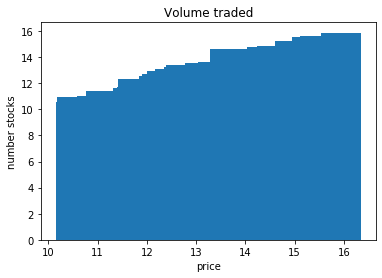

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.get_yaxis().get_major_formatter().set_scientific(False)

ax.bar(data[:,0], data[:,4])
ax.autoscale_view()

plt.title("Volume traded")
plt.ylabel("number stocks")
plt.xlabel("price")
plt.show()

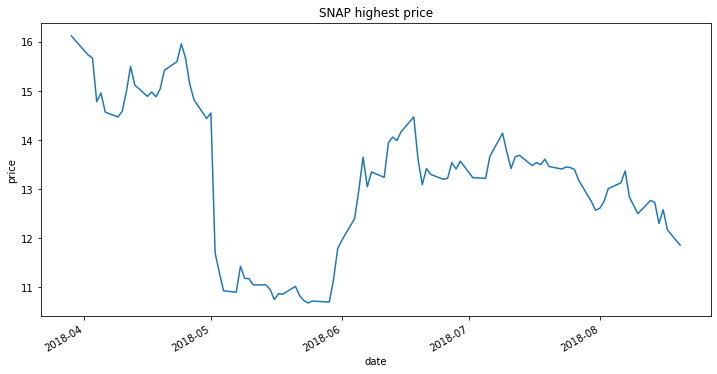

In [19]:
import datetime
import matplotlib
import matplotlib.dates as mdates


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
dates2 = matplotlib.dates.date2num([datetime.datetime.strptime(d, "%b %d %Y") for d in dates])

plt.plot_date(dates2,np.float64(stock[:,1]),'-')
plt.gcf().autofmt_xdate()

plt.title("SNAP highest price")
plt.ylabel("price")
plt.xlabel("date")
plt.show()

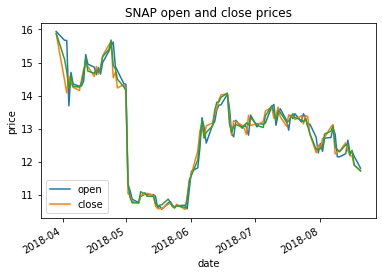

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dates2 = matplotlib.dates.date2num([datetime.datetime.strptime(d, "%b %d %Y") for d in dates])

plt.plot_date(dates2,np.float64(stock[:,0]),'-')
plt.plot_date(dates2,np.float64(stock[:,3]),'-')
plt.plot_date(dates2,(np.float64(stock[:,1]) + np.float64(stock[:,2]))/2,'-')
plt.gcf().autofmt_xdate()

plt.title("SNAP open and close prices")
plt.ylabel("price")
plt.xlabel("date")
plt.legend(['open', 'close' ], loc='lower left')
plt.show()

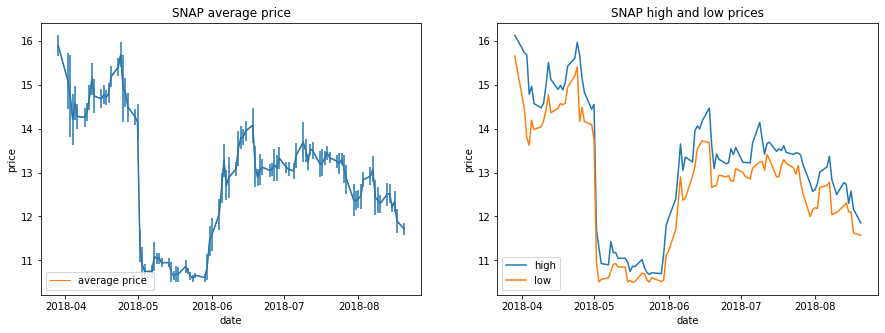

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

f.set_figwidth(15)
f.set_figheight(5)

ax1.errorbar(dates2, (np.float64(stock[:,1]) + np.float64(stock[:,2]))/2,yerr=(np.float64(stock[:,1]) - np.float64(stock[:,2]))/2)
ax1.plot_date(dates2, (np.float64(stock[:,1]) + np.float64(stock[:,2]))/2, '-', lw=1)
ax1.set_title("SNAP average price")
ax1.set_ylabel("price")
ax1.set_xlabel("date")
ax1.legend(['average price '], loc='lower left')

ax2.plot_date(dates2, np.float64(stock[:,1]), '-')
ax2.plot_date(dates2, np.float64(stock[:,2]), '-')
ax2.set_title("SNAP high and low prices")
ax2.set_ylabel("price")
ax2.set_xlabel("date")
ax2.legend(['high', 'low' ], loc='lower left')


plt.show()


## Historical drawdown

The stock market tends to rise over time, but that doesn't mean that you won't have periods of drawdown.

Drawdown can be measured as the percentage loss from the highest cumulative historical point.

In Python, you can use the .accumulate()  and .maximum() functions to calculate the running maximum, and the simple formula below to calculate drawdown:

$$ Drawdown = \frac{r_t}{RM} -1 $$

Where
- $r_t$: Cumulative return at time t
- $RM$: Running maximum

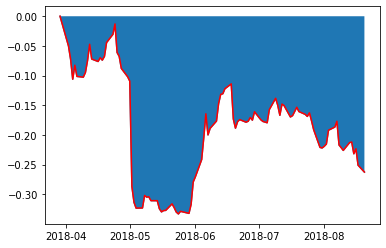

In [56]:
cum_rets = (np.float64(stock[:,1]) + np.float64(stock[:,2]))/(np.float64(stock[0,1]) + np.float64(stock[0,2]))
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1

# Plot the results
fig, ax = plt.subplots(1, 1)
ax.plot_date(dates2, drawdown, '-')
plt.fill_between(dates2, drawdown)
ax.plot_date(dates2, cum_rets -1, 'r-')
plt.show()